# Import Required Packages

In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Load MLB Data (Team Salaries & Wins)

In [4]:
mlb_salaries_wins = pd.read_excel("Datasets/MLB_Salaries&Wins.xlsx")
mlb_salaries_wins = mlb_salaries_wins[mlb_salaries_wins["YEAR"] != 2016] # Have not completed full season yet
mlb_salaries_wins.head(10)

,RANK,TEAM,OPENING DAY,CURRENT,AVG SALARY,MEDIAN,YEAR,WINS
30,1,Dodgers,223352402.0,223352402.0,7445080,5166666,2015,92
31,2,Yankees,213472857.0,213472857.0,7361133,3300000,2015,87
32,3,Red Sox,182161414.0,182161414.0,6072047,3500000,2015,78
33,4,Tigers,172282250.0,172282250.0,6891290,3000000,2015,74
34,5,Giants,166495942.0,166495942.0,5946284,4000000,2015,84
35,6,Nationals,166010977.0,166010977.0,5724516,2500000,2015,83
36,7,Angels,146449583.0,146449583.0,5049986,1312500,2015,85
37,8,Rangers,144307373.0,144307373.0,4509605,937500,2015,88
38,9,Phillies,133048000.0,133048000.0,4434933,700000,2015,63
39,10,Padres,126369628.0,126369628.0,4357573,1650000,2015,74


## Normalize Data

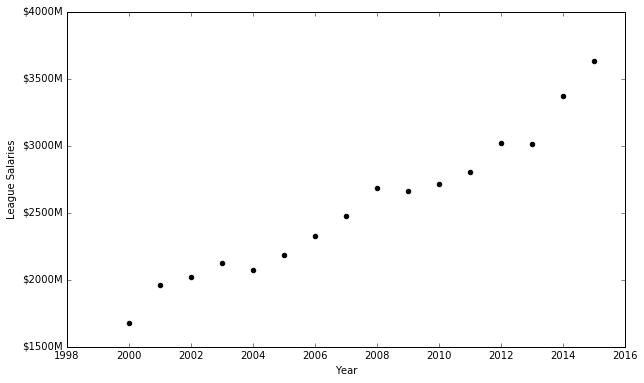

In [5]:
# Salaries should be normalized year-to-year
yearly_data = mlb_salaries_wins.groupby("YEAR").sum()
years = yearly_data.index
aggregated_salaries = yearly_data['OPENING DAY']


# Set Unit formatting for y-axis
def millions(x, pos):
    'The two args are the value and tick position'
    return '$%1.0fM' % (x*1e-6)

formatter = FuncFormatter(millions)
fig, ax = plt.subplots(figsize=(10, 6))
ax.yaxis.set_major_formatter(formatter)


# Plot League Salaries v. Year
plt.scatter(years, aggregated_salaries,  color='black')
plt.xlabel("Year")
plt.ylabel("League Salaries")
plt.show()

#### Apply Function to Normalize Data

In [ ]:
# Normalize Data Here

#### Select Required Columns

In [45]:
salaries = mlb_salaries_wins["OPENING DAY"].reshape(-1,1)
wins = mlb_salaries_wins["WINS"].reshape(-1,1)

#### Apply Linear Regression Model

In [46]:
model = LinearRegression()
model.fit(salaries, wins)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# Create Scatterplot of Wins v. Salaries

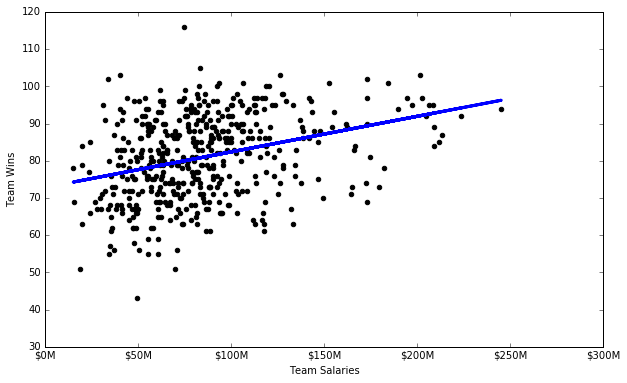

In [47]:
# Set Unit formatting for x-axis
def millions(x, pos):
    'The two args are the value and tick position'
    return '$%1.0fM' % (x*1e-6)

formatter = FuncFormatter(millions)
fig, ax = plt.subplots(figsize=(10, 6))
ax.xaxis.set_major_formatter(formatter)


# Plot Wins v. Team Salaries
plt.scatter(salaries, wins,  color='black')
plt.plot(salaries, model.predict(salaries), color='blue',
         linewidth=3)
plt.xlabel("Team Salaries")
plt.ylabel("Team Wins")
plt.show()

# Check Accuracy of Model

In [48]:
print("Coefficient of Determination R^2 : %1.4f" % model.score(salaries, wins))

Coefficient of Determination R^2 : 0.1063
